# 2.2. Problem Statement: Machine Learning 2

Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

# Solution

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
labels = boston.feature_names
print(labels)
bos = pd.DataFrame(boston.data,columns=labels)
bos.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
#Get the information about the various columns to understand what they represent
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# From the above, we can undertsand that our target is the MEDV attribute , which is not shown in the basic data, it is represented by the target variable which we now add to the main df
bos['price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# Checking if there are anu null values in the dataframe
bos.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

No null (NaN) values were observed in the dataset

## Exploratory Data Analysis

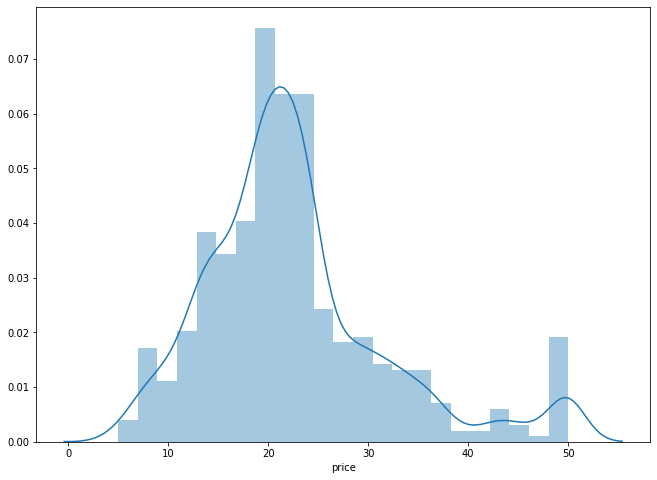

In [41]:
#Visualization of target value - price
import seaborn as sns
a4_dims = (11, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(bos['price'])

It can be observed that the price value almost follows a normal distribution with few variations(outliers) <br/>
Now we try to get the relationship between the variables by calculating correlation matrix,

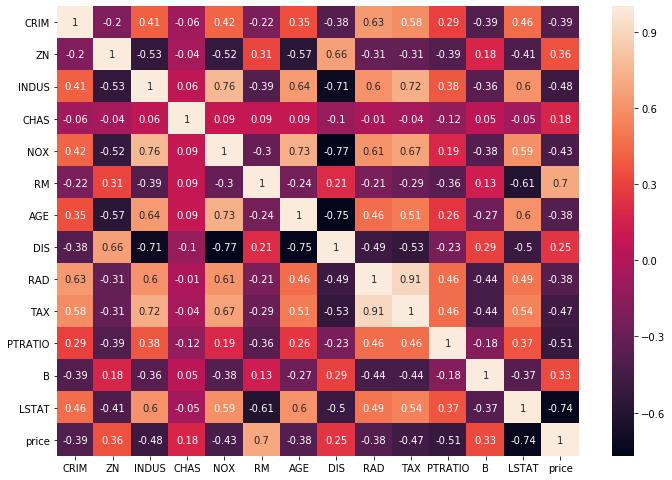

In [42]:
corr_matrix=bos.corr().round(2)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr_matrix,annot=True)

Checking the correlation value of various features against price (last column), it can be observed that RM has a strong positive correlation with it (0.7) while LSTAT has a strong negative correlation(-0.74). So both these features significantly affects the price value. So both of these features can be used for training and fitting the model.<br/>
It should also be noted that certain features have strong cross correlation , like RAD and TAX value being 0.91, and DIS and NOS , with a value of -0.77. These should never be considered together because we cannot distinguish the effect of NOS on price and DIS on price. However they are not being considered as features here since their respective correlation values with price is low.

Now we create new data with the selected features(RM and LSAT) for model fitting

In [50]:
X = bos[['LSTAT','RM']]
print(X.head())
y = bos['price']
print("\nPrice Data:")
print(y.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147

Price Data:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


## Training and Evaluating the model

In [58]:
# Splitting the data to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print("Shape of Training set:",X_train.shape)
print("Shape of labelled data for Training:",y_train.shape)
print("Shape of Testing set:",X_test.shape)
print("Shape of labelled data for Testing:",y_test.shape)

Shape of Training set: (404, 2)
Shape of labelled data for Training: (404,)
Shape of Testing set: (102, 2)
Shape of labelled data for Testing: (102,)


In [59]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# Model Evaluation
# Evaluating for training set
from sklearn import metrics
y_train_pred = model.predict(X_train) # Model prediction for train set
print("Original output for training set:")
print(y_train[0:5])
print("Predicted output for Training set:")
print(y_train_pred[:5])
print()

# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Training data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_train,y_train_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_train,y_train_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

#Evaluating for testing set
print()
y_test_pred = model.predict(X_test) # Model prediction for test set
print("Original output for testing set:")
print(y_test[0:5])
print("Predicted output for Testing set:")
print(y_test_pred[:5])
print()
print()
# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Testing data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Original output for training set:
192    36.4
138    13.3
251    24.8
13     20.4
256    44.0
Name: price, dtype: float64
Predicted output for Training set:
[32.94276018 15.01247542 28.70526226 23.37218714 34.21612432]

Testing the performance of the model for Training data:
Mean Absolute Error: 3.9455157740155897
Mean Squared Error: 29.9133862914607
Root Mean Squared Error: 5.469313146224185

Original output for testing set:
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: price, dtype: float64
Predicted output for Testing set:
[ 8.65152734 25.78279301 18.63108298 11.07823668 37.21536515]


Testing the performance of the model for Testing data:
Mean Absolute Error: 3.904262511555512
Mean Squared Error: 33.25101510372941
Root Mean Squared Error: 5.76636931731999
